# CUSUM

CUMSUM algorithm for drift detection

## Dependencies

In [12]:
import numpy
import matplotlib.pyplot as plt

## Algorithm

In [58]:
# Input:
# x: Stream of data to analyse for concept drift
# threshold: Value to launch the alarm

# Output:
# Plot of the data stream with change indicator and time of the change

def cusum(x, threshold = 1):
    S_pos = np.zeros(x.size)
    S_neg = np.zeros(x.size)
    for i in range(1, x.shape[0]):
        s = x[i] - x[i-1]        
        S_neg[i] = S_neg[i-1] - s
        S_pos[i] = S_pos[i-1] + s
        if (S_neg[i] > threshold) or (S_pos[i] > threshold):
            # Reset values
            plt.plot(x, color = 'b')
            plt.axvline(i, color='red', linewidth=1)
            plt.title('Change detected at: ' + str(i))
            S_neg[i] = 0
            S_pos[i] = 0

## Test

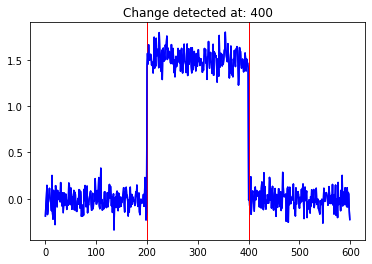

In [59]:
x_1 = np.random.normal(0, 0.1, 200)
x_2 = np.random.normal(1.5, 0.1, 200)
x_3 = np.random.normal(0, 0.1, 200)
x = np.concatenate((x_1, x_2, x_3))
cusum(x)